<a href="https://colab.research.google.com/github/vidulavk/MNIST/blob/main/First_DL_Program_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Ref: https://towardsdatascience.com/handwritten-digit-mnist-pytorch-977b5338e627

# 1. Importing Libraries


In [ ]:
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
from torchsummary import summary

# 2. Setting Variables

In [ ]:
# data loader variables
batch_size = 64

# network design variables
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# training variables
epochs = 50

# 3. Data Handling

In [ ]:
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

In [ ]:
# dataset function
trainset = datasets.MNIST('PATH_TO_STORE_TRAINSET', download=True, train=True, transform=transform)
valset = datasets.MNIST('PATH_TO_STORE_TESTSET', download=True, train=False, transform=transform)
#data loader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
valloader = torch.utils.data.DataLoader(valset, batch_size=batch_size, shuffle=True)

100%|██████████| 9912422/9912422 [00:00<00:00, 113267724.75it/s]


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 26414237.64it/s]


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 30626088.37it/s]


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 2852302.56it/s]


Extracting PATH_TO_STORE_TRAINSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TRAINSET/MNIST/raw



100%|██████████| 9912422/9912422 [00:00<00:00, 109667485.02it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 31827560.12it/s]


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/train-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 31521694.96it/s]


Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-images-idx3-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13444268.71it/s]

Extracting PATH_TO_STORE_TESTSET/MNIST/raw/t10k-labels-idx1-ubyte.gz to PATH_TO_STORE_TESTSET/MNIST/raw



# 4. Sanity Check

### Dimension Check

In [ ]:
i=0
for images, labels in trainloader:
    i+=1
    print(i)
    print(images.shape)
    print(labels.shape)
    break

1
torch.Size([64, 1, 28, 28])
torch.Size([64])


### Image Display

In [ ]:
print((images[11].numpy().squeeze()).shape)

(28, 28)


tensor(4)


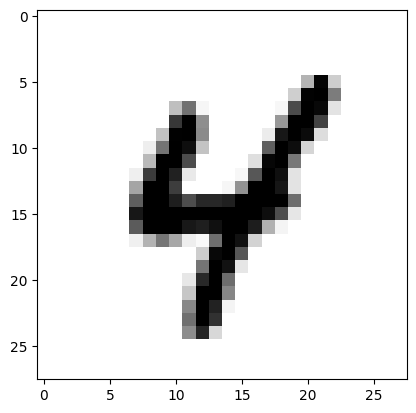

In [ ]:
plt.imshow(images[11].numpy().squeeze(), cmap='gray_r');
print(labels[11])

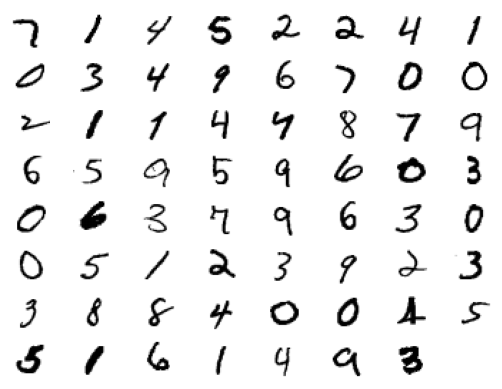

In [ ]:
figure = plt.figure()
num_of_images = 64
for index in range(1, num_of_images):
    plt.subplot(8, 8, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# 4. Network Design

#### Architecture

In [ ]:
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.LogSoftmax(dim=1))
print(model)

summary(model, (input_size,))

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                  [-1, 128]         100,480
              ReLU-2                  [-1, 128]               0
            Linear-3                   [-1, 64]           8,256
              ReLU-4                   [-1, 64]               0
            Linear-5                   [-1, 10]             650
        LogSoftmax-6                   [-1, 10]               0
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.42
Estimated Total Size (M

#### Loss Function

In [ ]:
criterion = nn.NLLLoss()

back propagation example problem: https://www.youtube.com/watch?v=zk2mcAz-MNI

#### sanity check

In [ ]:
i=0
for images, labels in trainloader:
    i+=1
    print(i)
    print(images.shape)
    print(labels.shape)
    break

# to convert the 2D input matrix to a 1D vector
images = images.view(images.shape[0], -1)
print(images.shape)


1
torch.Size([64, 1, 28, 28])
torch.Size([64])
torch.Size([64, 784])


forward prop

In [ ]:
# forward prop
outputs = model(images) #log probabilities
print(outputs.shape)
print(outputs[0],labels[0])

torch.Size([64, 10])
tensor([-2.3787, -2.3825, -2.2058, -2.3559, -2.1451, -2.3237, -2.2341, -2.3719,
        -2.2769, -2.3850], grad_fn=<SelectBackward0>) tensor(2)


In [ ]:
loss = criterion(outputs[0], labels[0]) #calculate the NLL loss
loss

tensor(2.2058, grad_fn=<NllLossBackward0>)

backward prop

In [ ]:
print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): LogSoftmax(dim=1)
)


In [ ]:
print(model[0])

Linear(in_features=784, out_features=128, bias=True)


In [ ]:
print(model[0].weight)

Parameter containing:
tensor([[ 0.0097,  0.0088, -0.0042,  ...,  0.0147,  0.0209, -0.0160],
        [ 0.0341, -0.0113, -0.0042,  ..., -0.0097,  0.0270, -0.0116],
        [ 0.0014,  0.0215, -0.0121,  ..., -0.0096,  0.0024, -0.0141],
        ...,
        [ 0.0042,  0.0016,  0.0133,  ...,  0.0141,  0.0078,  0.0252],
        [-0.0347, -0.0020, -0.0216,  ...,  0.0214,  0.0041, -0.0230],
        [-0.0071,  0.0018, -0.0021,  ..., -0.0130, -0.0180,  0.0319]],
       requires_grad=True)


In [ ]:
print(model[0].weight.shape)

torch.Size([128, 784])


In [ ]:
print(model[0].weight.grad)

None


In [ ]:
print('Before backward pass: \n', model[0].weight.grad)
loss.backward()
print('After backward pass: \n', model[0].weight.grad)

Before backward pass: 
 None
After backward pass: 
 tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0053, 0.0053, 0.0053,  ..., 0.0053, 0.0053, 0.0053],
        [0.0051, 0.0051, 0.0051,  ..., 0.0051, 0.0051, 0.0051],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        [0.0029, 0.0029, 0.0029,  ..., 0.0029, 0.0029, 0.0029],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]])


In [ ]:
optimizer = optim.SGD(model.parameters(), lr=0.003)

In [ ]:
optimizer.step()

In [ ]:
print(model[0].weight)

Parameter containing:
tensor([[ 0.0097,  0.0088, -0.0042,  ...,  0.0147,  0.0209, -0.0160],
        [ 0.0341, -0.0113, -0.0042,  ..., -0.0098,  0.0270, -0.0116],
        [ 0.0014,  0.0214, -0.0121,  ..., -0.0096,  0.0024, -0.0141],
        ...,
        [ 0.0042,  0.0016,  0.0133,  ...,  0.0141,  0.0078,  0.0252],
        [-0.0347, -0.0020, -0.0216,  ...,  0.0214,  0.0041, -0.0230],
        [-0.0071,  0.0018, -0.0021,  ..., -0.0130, -0.0180,  0.0319]],
       requires_grad=True)


#### Training Loop

In [ ]:
time0 = time()
for e in range(epochs):
    running_loss = 0
    #batch = 0
    for images, labels in trainloader:

        # Flatten MNIST images into a 784 long vector
        images = images.view(images.shape[0], -1)

        # Training pass
        optimizer.zero_grad()

        output = model(images)
        loss = criterion(output, labels)
        #print("batch no.: ", batch+1, " loss for this batch: ", loss)
        #batch+=1
        running_loss += loss.item()

        #This is where the model learns by backpropagating
        loss.backward()

        #And optimizes its weights here
        optimizer.step()
    print("Epoch {} - Training loss: {}".format(e+1, running_loss/len(trainloader)))
print("\nTraining Time (in minutes) =",(time()-time0)/60)

Epoch 1 - Training loss: 1.8438320617431772
Epoch 2 - Training loss: 0.8105649506168833
Epoch 3 - Training loss: 0.5177183947933
Epoch 4 - Training loss: 0.4255062627957574
Epoch 5 - Training loss: 0.3815729491460298
Epoch 6 - Training loss: 0.356518667834654
Epoch 7 - Training loss: 0.33834697035298167
Epoch 8 - Training loss: 0.3244771998701319
Epoch 9 - Training loss: 0.3130381966530006
Epoch 10 - Training loss: 0.3031608865284589
Epoch 11 - Training loss: 0.29477999961452445
Epoch 12 - Training loss: 0.2863902300913959
Epoch 13 - Training loss: 0.2792262828219801
Epoch 14 - Training loss: 0.27201427041944154
Epoch 15 - Training loss: 0.2655079166120939
Epoch 17 - Training loss: 0.2526409598722704
Epoch 18 - Training loss: 0.24672976202929198
Epoch 19 - Training loss: 0.24091324861894156
Epoch 20 - Training loss: 0.23498467459226213
Epoch 21 - Training loss: 0.22928285068556317
Epoch 22 - Training loss: 0.22346471296126907
Epoch 23 - Training loss: 0.2184241048451553
Epoch 24 - Trai

# Testing

In [ ]:
correct_count, all_count = 0, 0
for images,labels in valloader:
  for i in range(len(labels)):
    img = images[i].view(1, 784)
    with torch.no_grad():
        logps = model(img)


    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.numpy()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))

Number Of Images Tested = 10000

Model Accuracy = 0.9623


save model

In [ ]:
torch.save(model, './my_mnist_model.pt')

# Sample test

In [ ]:
from PIL import Image


# Load the PNG image as a grayscale image
image_path = '/content/6.png'
original_image = Image.open(image_path).convert('L')  # 'L' mode is for grayscale

# Define the transformation
transform = transforms.Compose([transforms.ToTensor(),
                                transforms.Resize((28, 28)),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])

# Apply the transformation
transformed_image = transform(original_image)
transformed_image = 1.0 - transformed_image
# Print the shape of the resulting tensor
print("Transformed Image Shape:", transformed_image.shape)

# You can now use transformed_image in your PyTorch model or further processing


Transformed Image Shape: torch.Size([1, 28, 28])


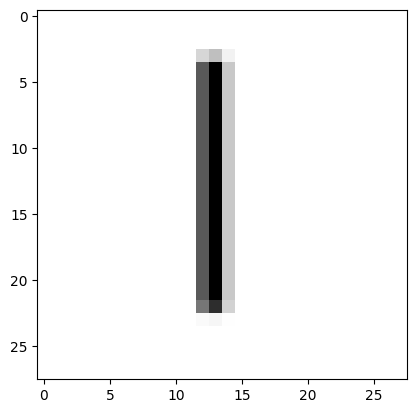

In [ ]:
image = transformed_image.permute(1, 2, 0)  # Adjust dimensions for Matplotlib

# Display the image
plt.imshow(image, cmap='gray_r')
plt.show()

In [ ]:
img = transformed_image.view(1, 784)

In [ ]:
with torch.no_grad():
    logps = model(img)
    ps = torch.exp(logps)
    probab = list(ps.numpy()[0])
    pred_label = probab.index(max(probab))
    print("The predicted output is: ", pred_label)

The predicted output is:  8
